In [3]:
#these models are designed to run on mobile phones with way fewer parameters (W,b)
# They arent as accurate as the bigger model

#import relevant libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import imagenet_utils

from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [4]:
mobile = tf.keras.applications.mobilenet.MobileNet()

17227776/17225924 [==============================] - 1s 0us/step


In [8]:
def prepare_image(file):
    img_path = 'data/MobileNet-samples/'
    img = image.load_img(img_path + file, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

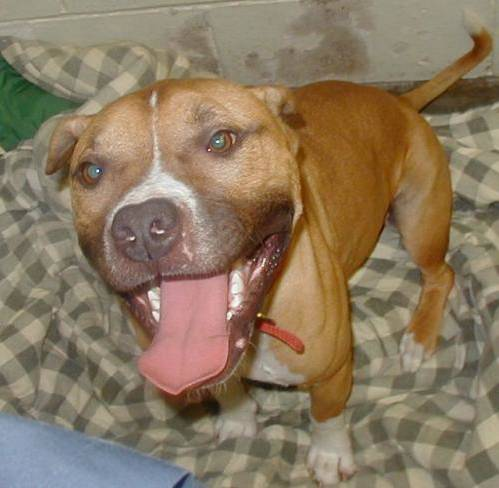

In [9]:
from IPython.display import Image
#for one random image 
Image(filename='data/MobileNet-samples/dog.6.jpg', width=300, height=200)

In [11]:
preprocessed_img = prepare_image('dog.6.jpg')
predictions = mobile.predict(preprocessed_img)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n02093428', 'American_Staffordshire_terrier', 0.69491076),
  ('n02093256', 'Staffordshire_bullterrier', 0.28876835),
  ('n02108089', 'boxer', 0.0054507973),
  ('n02100583', 'vizsla', 0.005092169),
  ('n02087394', 'Rhodesian_ridgeback', 0.0016628893)]]